## **Dimensionality reduction : PCA**

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/PCA dataset.csv')

# Splitting the dataset into numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Creating a preprocessor that standardizes numerical data and one-hot encodes categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a PCA model
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization

# Creating a pipeline that preprocesses the data and then applies PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca)])

# Fitting the PCA model to the data
pipeline.fit(data)

# Getting the PCA transformed data
pca_data = pipeline.transform(data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])

pca_df.head()



,Principal Component 1,Principal Component 2
0,-0.338376,-0.782468
1,-0.971704,0.485487
2,0.963221,1.071686
3,-2.301711,0.045320
4,-0.309801,-1.161773


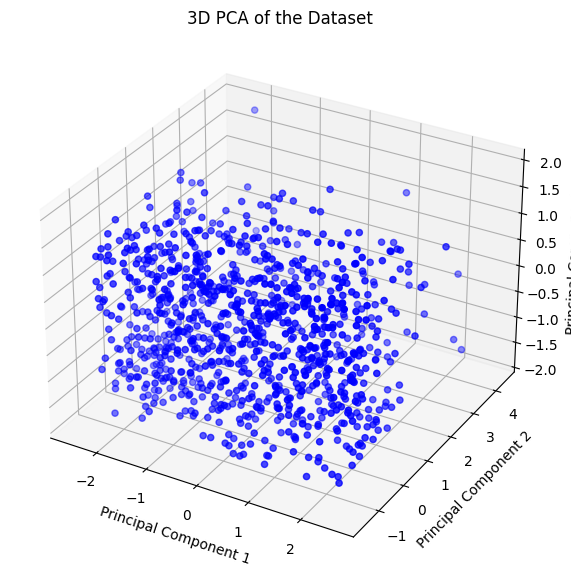

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Updating the PCA model to 3 dimensions for 3D visualization
pca_3d = PCA(n_components=3)
pipeline_3d = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca_3d)])
pipeline_3d.fit(data)
pca_data_3d = pipeline_3d.transform(data)

# Creating a DataFrame for the 3D PCA results
pca_df_3d = pd.DataFrame(data=pca_data_3d, columns=['PC1', 'PC2', 'PC3'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c='blue', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title("3D PCA of the Dataset")
plt.show()



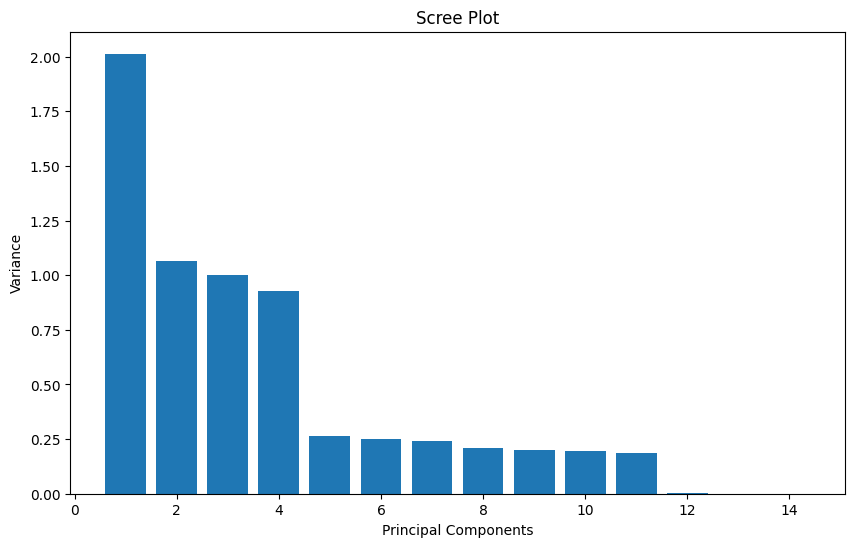

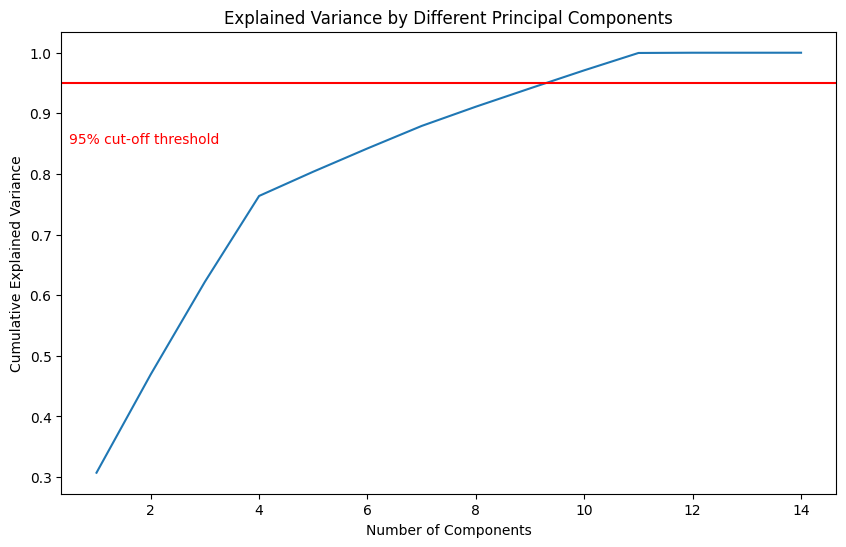

In [6]:
import numpy as np

# Preprocessing the data: Standardizing numerical and one-hot encoding categorical features
preprocessed_data = pipeline.named_steps['preprocessor'].transform(data)

# Performing PCA on the preprocessed data
pca_full = PCA().fit(preprocessed_data)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_full.explained_variance_) + 1), pca_full.explained_variance_)
plt.ylabel('Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_))
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('Explained Variance by Different Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red')
plt.show()



## **Dimensionality reduction : SVD**

In [12]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/content/PCA dataset.csv')  # Update the path

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessor
data_preprocessed = preprocessor.fit_transform(data)

# Apply SVD
svd = TruncatedSVD(n_components=3)  # Choose the number of components
svd_features = svd.fit_transform(data_preprocessed)

# Convert to DataFrame (optional)
svd_df = pd.DataFrame(svd_features, columns=['SVD1', 'SVD2', 'SVD3'])

# Display the results
print(svd_df.head())

       SVD1      SVD2      SVD3
0 -0.338195 -0.783066  1.082597
1 -0.971523  0.484886  1.352641
2  0.963402  1.071061 -1.452900
3 -2.301530  0.044695 -1.462440
4 -0.309618 -1.162410 -1.618955


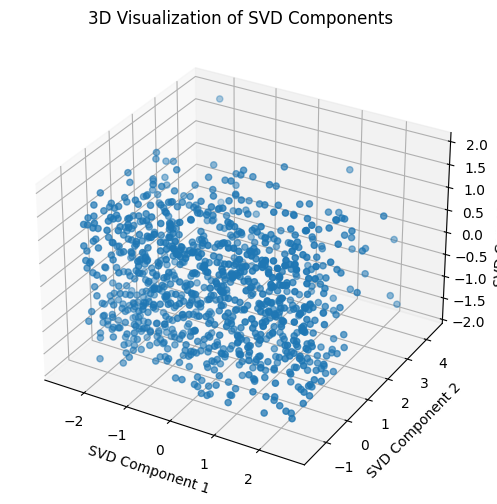

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three SVD components
ax.scatter(svd_df['SVD1'], svd_df['SVD2'], svd_df['SVD3'])

ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')

plt.title('3D Visualization of SVD Components')
plt.show()

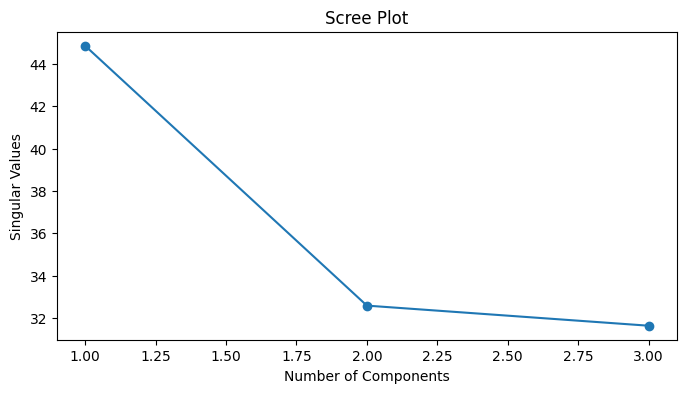

In [14]:
import matplotlib.pyplot as plt

# Assuming 'svd' is your TruncatedSVD fitted model
singular_values = svd.singular_values_

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(singular_values) + 1), singular_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Singular Values')
plt.title('Scree Plot')
plt.show()

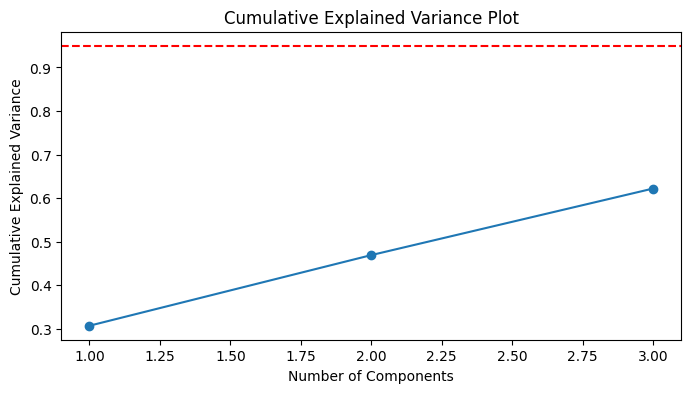

In [15]:
import numpy as np

cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance line
plt.show()

## **Dimensionality Reduction : MDS(This shows that MDS is not highly effective on this dataset)**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


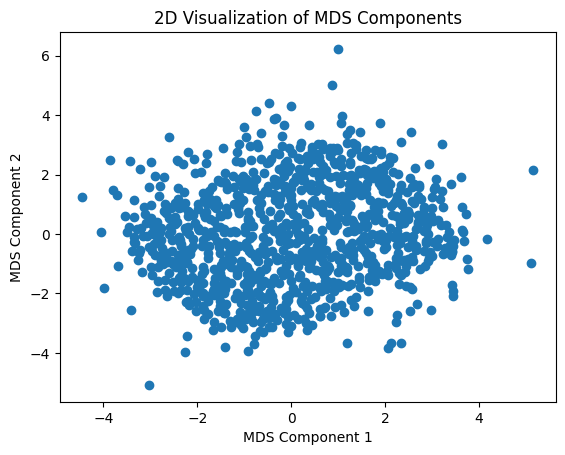

In [16]:
import pandas as pd
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/PCA dataset.csv')  # Update the path

# For Metric MDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)

# For Non-metric MDS
# mds = MDS(n_components=2, dissimilarity='euclidean', metric=False, random_state=42)

mds_transformed = mds.fit_transform(preprocessed_data)  # Replace 'preprocessed_data' with your actual preprocessed data


import matplotlib.pyplot as plt

# For 2D visualization
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1])
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('2D Visualization of MDS Components')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


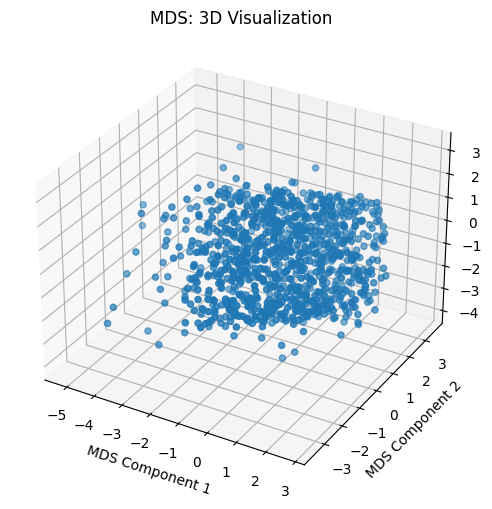

In [18]:
from sklearn.manifold import MDS

mds = MDS(n_components=3, random_state=42)
mds_transformed = mds.fit_transform(data_preprocessed)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mds_transformed[:, 0], mds_transformed[:, 1], mds_transformed[:, 2])
ax.set_xlabel('MDS Component 1')
ax.set_ylabel('MDS Component 2')
ax.set_zlabel('MDS Component 3')
plt.title('MDS: 3D Visualization')
plt.show()


## **Dimensionality Reduction : ISOMAP**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

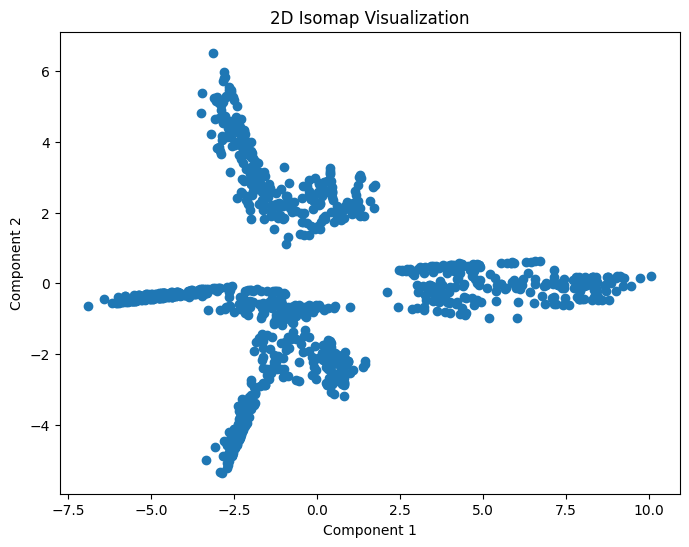

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('/content/Dataset 2.csv')

# Separate numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Imputers for missing values (if needed)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder())]), categorical_features)
    ])

data_preprocessed = preprocessor.fit_transform(data)

# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=5)  # Adjust as needed
data_isomap = isomap.fit_transform(data_preprocessed)

# Convert to DataFrame for visualization
isomap_df = pd.DataFrame(data_isomap, columns=['Component 1', 'Component 2'])

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(isomap_df['Component 1'], isomap_df['Component 2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Isomap Visualization')
plt.show()


## **DDimensionality Reduction : LLE**

In [23]:
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [25]:
# Load the dataset
data = pd.read_csv('/content/Dataset 2.csv')

# Separate numerical and categorical columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Imputers for missing values (if needed)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder())]), categorical_features)
    ])

data_preprocessed = preprocessor.fit_transform(data)

In [26]:
# Configure and apply LLE
n_neighbors = 10  # Number of neighbors to consider; adjust as needed
n_components = 2  # Number of dimensions to reduce the data to

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard', random_state=42)
data_lle = lle.fit_transform(data_preprocessed)

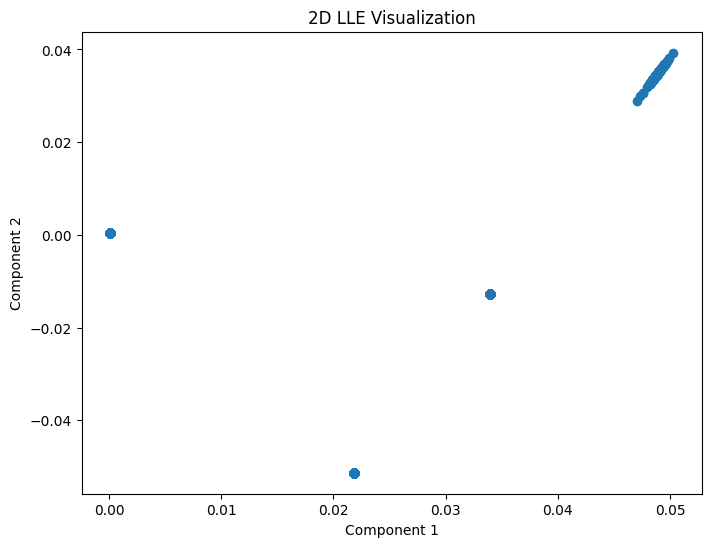

In [27]:
# Convert to DataFrame for visualization
lle_df = pd.DataFrame(data_lle, columns=['Component 1', 'Component 2'])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(lle_df['Component 1'], lle_df['Component 2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D LLE Visualization')
plt.show()

## **Dimensionality Reduction : UMAP**

In [32]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=795c142e560870f389a6f9cc1fbc198c1bfcea3e5757bfce4762fd195e02dbb3
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


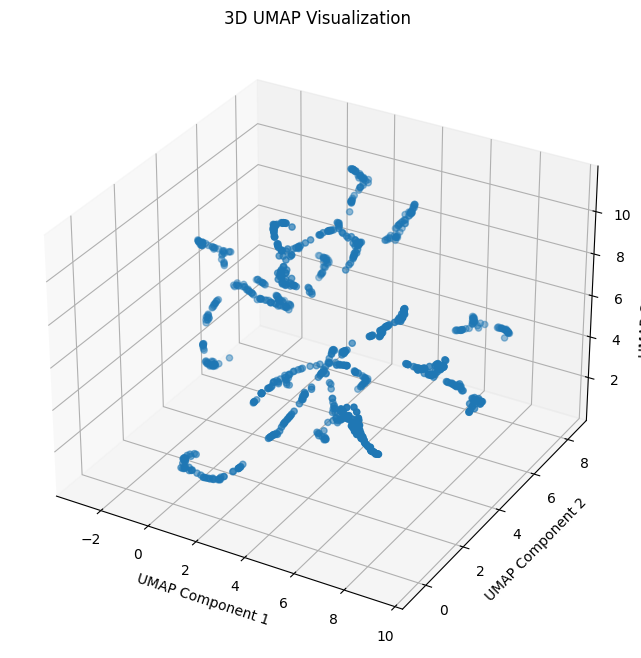

In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('/content/Dataset 3.csv')

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Imputers for missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder())]), categorical_cols)
    ])

# Apply preprocessing
data_preprocessed = preprocessor.fit_transform(data)

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=15, n_components=3, random_state=42)
data_umap_3d = umap_model.fit_transform(data_preprocessed)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_umap_3d[:, 0], data_umap_3d[:, 1], data_umap_3d[:, 2])
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.title('3D UMAP Visualization')
plt.show()


## **Dimensionality Reduction : T-sne**

In [36]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
data = pd.read_csv('/content/Dataset 3.csv')

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Imputers for missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([('imputer', cat_imputer), ('encoder', OneHotEncoder())]), categorical_cols)
    ])

data_preprocessed = preprocessor.fit_transform(data)

In [39]:
# Configure and apply t-SNE
tsne = TSNE(n_components=3, random_state=42)  # Use n_components=3 for 3D visualization
data_tsne = tsne.fit_transform(data_preprocessed)

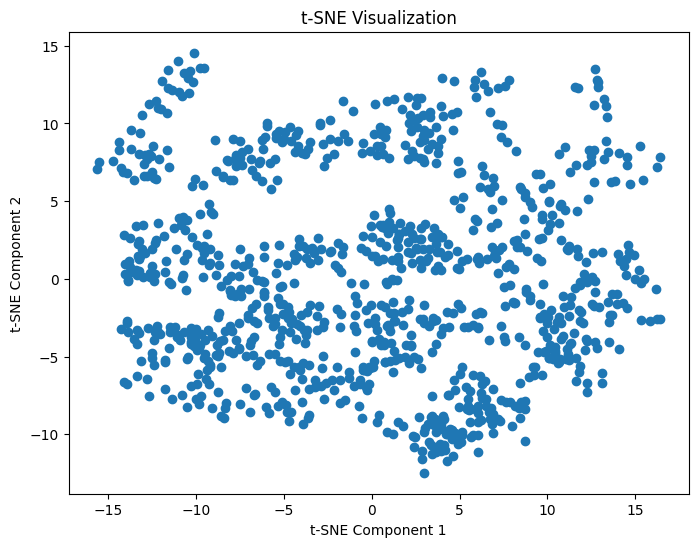

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()